# Модуль Networkx. Тренажёр по работе с графами

In [ ]:
# импортируем необходимые для работы библиотеки - networkX и matplotlib
import networkx as nx
import matplotlib.pyplot as plt

## Создание пустого графа

In [2]:
is_oriented = input('Создаём ориентированный граф? (y/n): ')
if is_oriented == 'y':
    G = nx.DiGraph()
else:
    G = nx.Graph()
print('G =', G)

Создаём ориентированный граф? (y/n): n
G = Graph with 0 nodes and 0 edges


## Добавление узлов

In [3]:
only_one = input('Добавить один узел? (y/n): ')
if only_one == 'y':
    node = input('Введите название узла: ')
    G.add_node(node)
else:
    nodes = input('Введите названия узлов через пробел: ')
    nodes = nodes.split()
    G.add_nodes_from(nodes)

Добавить один узел? (y/n): n
Введите названия узлов через пробел: 1 2 3 4 5 6


## Добавление рёбер

In [10]:
only_one = input('Добавить одно ребро? (y/n): ')
if only_one == 'y':
    while True:
        edge = input('Введите через пробел пару вершин для образорвания ребра: ')
        edge = edge.split()
        if len(edge) != 2:
            print('Неправильно задано ребро!')
        else:
            G.add_edge(*edge)
            break
else:
    while True:
        edges = input('Введите через пробел вершины для образования рёбер, для очередной пары будет образовано ребро: ')
        edges = edges.split()
        if len(edges) % 2 != 0:
            print('Рёбра должны быть образованы чётным числом вершин!')
        else:
            edges_list = [edges[i:i+2] for i in range(0, len(edges) - 1, 2)]
            G.add_edges_from(edges_list)
            break

Добавить одно ребро? (y/n): n
Введите через пробел вершины для образования рёбер, для очередной пары будет образовано ребро: 7 8 5 7 5 8


## Удаление узлов

In [8]:
only_one = input('Удалить один узел? (y/n): ')
if only_one == 'y':
    node = input('Введите название узла: ')
    if node not in G.nodes():
        print(f'Узла {node} нет в графе! В графе имеются узлы {G.nodes()}')
    else:
        G.remove_node(node)
else:
    nodes = input('Введите названия узлов через пробел: ')
    nodes = nodes.split()
    for node in nodes:
        if node not in G.nodes():
            print(f'Узла {node} нет в графе! В графе имеются узлы {G.nodes()}')
            break
    else:
        G.remove_nodes_from(nodes)

Удалить один узел? (y/n): n
Введите названия узлов через пробел: 1234
Узла 1234 нет в графе! В графе имеются узлы ['1', '2', '3']


## Удаление рёбер

In [19]:
only_one = input('Удалить одно ребро? (y/n): ')
if only_one == 'y':
    while True:
        edge = input('Введите через пробел пару верши для удаления ребра: ')
        edge = tuple(edge.split())
        if len(edge) != 2:
            print('Неправильно задано ребро! Ребро задаётся двумя вершинами!')
        elif edge not in G.edges():
            print(f'Между вершинами {edge[0]} и {edge[1]} нет ребра')
        else:
            G.remove_edge(*edge)
            break
else:
    while True:
        edges = input('Введите через пробел вершины для удаления рёбер, для очередной пары будет удалено ребро: ')
        edges = edges.split()
        if len(edges) % 2 != 0:
            print('Рёбра должны быть образованы чётным числом вершин!')
            continue
        edges_list = tuple(edges[i:i+2] for i in range(0, len(edges) - 1, 2))
        for edge in edges_list:
            if edge not in G.edges:
                print(f'Ребра {edge} нет в графе G! Есть рёбра: {G.edges()}')
                break
        else:
            edges_list = [edges[i:i+2] for i in range(0, len(edges) - 1, 2)]
            G.remove_edges_from(edges_list)
            break

Удалить одно ребро? (y/n): n
Введите через пробел вершины для удаления рёбер, для очередной пары будет удалено ребро: 1 3 7 5


## Вывод информации о числе узлов и ребер графа

In [20]:
print('Узлы графа:', G.nodes())
print('Рёбра графа:', G.edges())
print('Узел и его смежности:')
for node, neighbour in G.adj.items():
    neighbours = []
    for nbr, nbr_props in neighbour.items():
        neighbours.append(nbr)
    print(f'Для узла {node} смежными являются {neighbours}')

Узлы графа: ['1', '2', '3', '7', '8', '5']
Рёбра графа: [('1', '2'), ('7', '8'), ('8', '5')]
Узел и его смежности:
Для узла 1 смежными являются ['2']
Для узла 2 смежными являются ['1']
Для узла 3 смежными являются []
Для узла 7 смежными являются ['8']
Для узла 8 смежными являются ['7', '5']
Для узла 5 смежными являются ['8']


## Вывод топологии графа в графическом виде

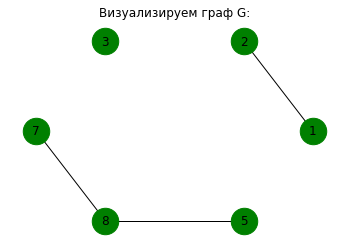

In [22]:
plt.title("Визуализируем граф G:")
nx.draw_circular(G,
         node_color='green',
         node_size=700,
         with_labels=True)
plt.show()

## Сохранение топологии графа в графическом виде

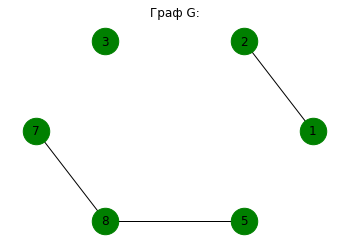

In [24]:
plt.title("Граф G:")
nx.draw_circular(G,
         node_color='green',
         node_size=700,
         with_labels=True)
plt.savefig("graph.png")

## Сохранение топологии в формате gml

In [25]:
nx.write_gml(G, 'graph.gml')

## Чтение графа из файла gml

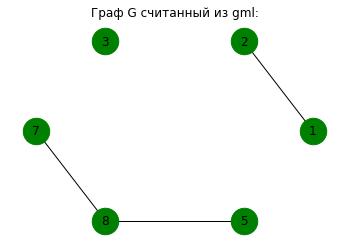

In [27]:
readed_G = nx.read_gml('graph.gml')
plt.title("Граф G считанный из gml:")
nx.draw_circular(G,
         node_color='green',
         node_size=700,
         with_labels=True)